In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base= automap_base()

# reflect the tables
Base.prepare(autoload_with= engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [9]:
# Save references to each table
Station= Base.classes.station
Measurement= Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Perform a query to retrieve the data and precipitation scores
Rain_one_year= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= search_date).order_by(Measurement.date).all()
Rain_one_year

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [24]:
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
search_date= dt.date(2017, 8, 23)-dt.timedelta(days=365)
print(f"This date is {search_date}")

This date is 2016-08-23


In [ ]:
One_Year


In [ ]:

Rain_one_year= session.query(Measurement.date, Measurement.)

In [31]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
Rain_one_year_df= pd.DataFrame(Rain_one_year, columns=['Date', 'Precipitation'])

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [39]:
# Sort the dataframe by date
Rain_one_year_df.sort_values('Date')
print(Rain_one_year_df)

            Precipitation
Date                     
2016-08-23           0.00
2016-08-23           0.15
2016-08-23           0.05
2016-08-23            NaN
2016-08-23           0.02
...                   ...
2017-08-22           0.50
2017-08-23           0.00
2017-08-23           0.00
2017-08-23           0.08
2017-08-23           0.45

[2230 rows x 1 columns]


Text(0, 0.5, 'Precipitation')

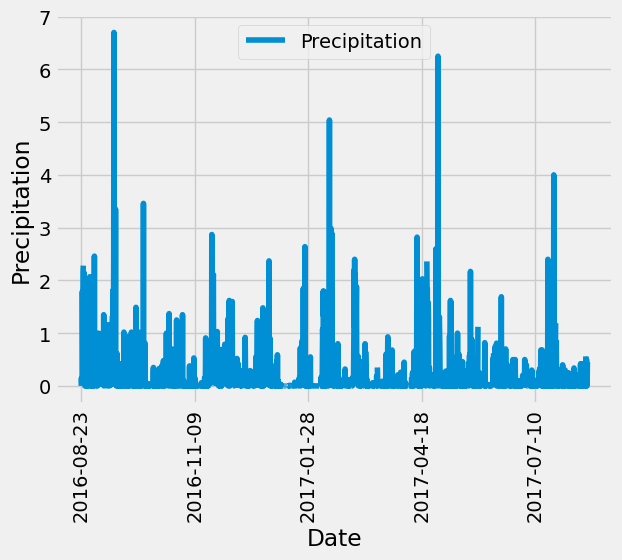

In [40]:
# Use Pandas Plotting with Matplotlib to plot the data
Rain_one_year_df.plot(y= 'Precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Precipitation")

In [41]:
# Use Pandas to calculate the summary statistics for the precipitation data
Rain_one_year_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [46]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Measurement.station.distinct())).scalar()

9

In [47]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order. THIS WAS REALLY HARD TO FIGURE OUT HOW TO DO!
session.query(Measurement.station, func.count(Measurement.station)).filter(Measurement.station == Station.station).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [50]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature. THIS WAS ALSO REALLY HARD TO FIGURE OUT HOW TO DO!
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.round(func.avg(Measurement.tobs))).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 72.0)]

In [53]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Temperature_one_year= session.query(Measurement.tobs).filter(Measurement.date >= search_date).\
    filter(Measurement.station == 'USC00519281').all()
print(Temperature_one_year)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

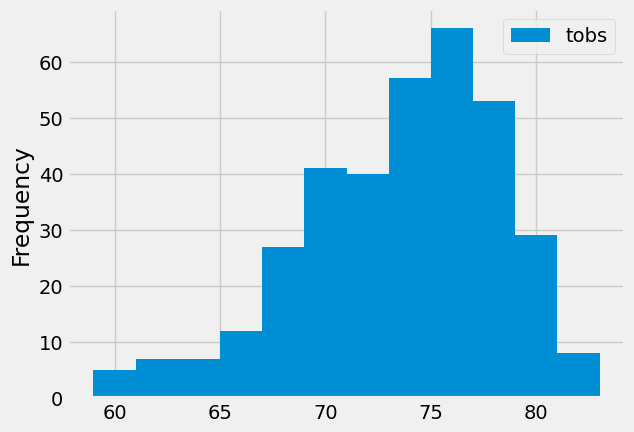

In [56]:
#Using .ravel from numpy to flatten the array to be used in the historgram plot
temperatures= list(np.ravel(Temperature_one_year))

#Plot the frequency of temperatture for a given value based on 12 levels of bins plt.hist(temps, bins=12)
plt.hist(temperatures, bins= 12)
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.show()


# Close Session

In [16]:
# Close Session
session.close()